# Material Deformation - Using QUBO


In [1]:
import sys as sys
import pandas as pd
import numpy as np
import pandas as pd
import random, math
import copy
import numba
from numba import jit
import tqdm
from time import time
from tqdm import tqdm
from matplotlib import pyplot as plt
df = pd.read_csv(r'C:\Users\Bhargav\BMW\Set C\A_6.csv',header=None)
#df.as_matrix()



In [2]:
#np.set_printoptions(threshold=sys.maxsize)

In [3]:
X1 = df.values

In [4]:
X1

array([[ 0.00119048,  0.00092076, -0.00033482, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00092076,  0.00602679, -0.00075335, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00033482, -0.00075335,  0.00602679, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.00602679,
        -0.00075335, -0.00033482],
       [ 0.        ,  0.        ,  0.        , ..., -0.00075335,
         0.00602679,  0.00092076],
       [ 0.        ,  0.        ,  0.        , ..., -0.00033482,
         0.00092076,  0.00119048]])

In [5]:

X1.shape

(256, 256)

In [6]:
X=X1
X

array([[ 0.00119048,  0.00092076, -0.00033482, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00092076,  0.00602679, -0.00075335, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00033482, -0.00075335,  0.00602679, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.00602679,
        -0.00075335, -0.00033482],
       [ 0.        ,  0.        ,  0.        , ..., -0.00075335,
         0.00602679,  0.00092076],
       [ 0.        ,  0.        ,  0.        , ..., -0.00033482,
         0.00092076,  0.00119048]])

0.015625

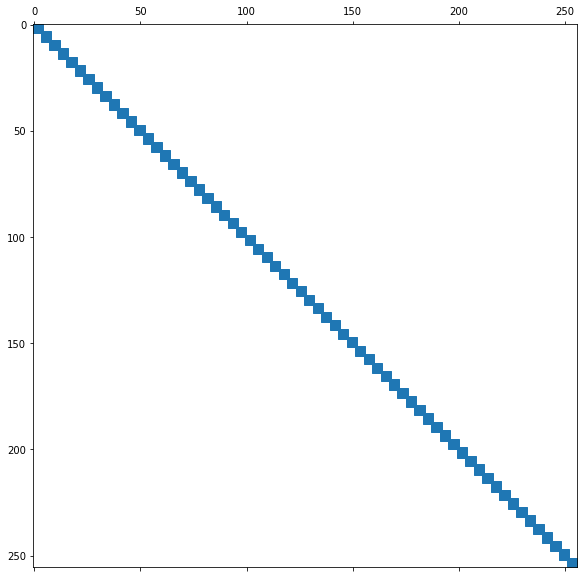

In [8]:
from numpy import count_nonzero
plt.spy(X, precision = 0.00, markersize = 4)
# betterspy.write_png("out.png", X , border_width=2, border_color="red", colormap="viridis")
# betterspy 1138.mtx [Matrix.png]
# betterspy.show(X)
# betterspy.write_png("X matrix", X)
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2.5, Size[1]*2.5, forward=True)

# plt.colorbar()
# plt.show()

sparsity = ( count_nonzero(X) / float(X.size) )
sparsity


In [9]:
df1 = pd.read_csv(r'C:\Users\Bhargav\BMW\Set C\b_6.csv',header=None)
#df.as_matrix()

In [10]:


Y1=df1.values

In [11]:
Y1.shape

(256, 1)

In [12]:
Y = Y1

In [13]:
Y

array([[-3.14118904e-81],
       [-2.38574099e-80],
       [ 8.85478350e-80],
       [ 1.33538740e-75],
       [-4.62800588e-76],
       [-3.51382034e-75],
       [ 1.31508716e-74],
       [ 1.33275624e-70],
       [-4.60348231e-71],
       [-3.49458073e-70],
       [ 1.32050217e-69],
       [ 8.98427656e-66],
       [-3.09059704e-66],
       [-2.34600291e-65],
       [ 8.96357886e-65],
       [ 4.08973457e-61],
       [-1.39979760e-61],
       [-1.06270622e-60],
       [ 4.11266751e-60],
       [ 1.25678643e-56],
       [-4.27479618e-57],
       [-3.24676846e-56],
       [ 1.27526001e-55],
       [ 2.60638520e-52],
       [-8.79625074e-53],
       [-6.68662077e-52],
       [ 2.67195752e-51],
       [ 3.64637941e-48],
       [-1.21855134e-48],
       [-9.27673810e-48],
       [ 3.78204249e-47],
       [ 3.43987411e-44],
       [-1.13524450e-44],
       [-8.66308075e-44],
       [ 3.61563981e-43],
       [ 2.18707910e-40],
       [-7.10293938e-41],
       [-5.44020107e-40],
       [ 2.3

In [14]:
Dimension = 256
bits = 16    
#b = HDimension = 16
#qubits = 2
A = X
b = Y
m = 8

In [15]:
t0 = time()

In [16]:
QM = np.zeros(((bits+1)*Dimension, (bits+1)*Dimension), dtype=np.float64)
QM

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
QM.shape

(4352, 4352)

In [18]:
for k in range(Dimension):
    for i in range(Dimension):
        for l in range(-13,3):
            cef1 = pow(2,2*l)* pow (A[k][i],2)-pow(2,l+1)* A[k][i]*b[k]
            po1 = 17*i + l + 13
            QM[po1][po1] = QM[po1][po1] + cef1
            #################################################
            cef2 = -pow(2,(l+m+2))* pow (A[k][i],2)
            po3 = 17*i + 1  # q_i-
            po4 = 17*i + l + 13 #q_i,l +
            QM[po3][po4] = QM[po3][po4] + cef2
            
            
#QM #okkkkkkkkkkkkkkkkkkkkkk

In [19]:

# No l loop +13?????

# 2nd for loop
for k in range(Dimension):
    for i in range(Dimension):
            cef1 = pow(2,(2*m+2))* pow (A[k][i],2)
            cef2= pow(2,m+2)* A[k][i]*b[k]
            po1 = 17*i  
            po2 = 17*i + 1
            QM[po2][po2] = QM[po2][po2] + cef1 #q-
            QM[po1][po1] = QM[po1][po1] + cef2  # q+
            
#QM #okkkkkkkkkkkkkkkkkk

In [23]:
# 3rd for loop
@jit(nopython=True)

def faster0(QM): 
    for k in range(Dimension):
        for i in range(Dimension):
            for l1 in range(-13,2):
                for l2 in range(l1+1,3):
                    qcef = pow(2, l1+l2+1)*pow(A[k][i],2)
                    po1 = 17*i + l1 + 13
                    po2 = 17*i + l2 + 13
                    QM[po1][po2] = QM[po1][po2] + qcef
    return QM

QM = faster0(QM)  
#QM
######### okkkkkk 

In [24]:
## 4th for loop
@jit(nopython=True)

def faster(QM):  
    for k in range(Dimension):
        for i in range(Dimension-1):
            for j in range(i+1,Dimension):
                for l1 in range(-13,3):
                    for l2 in range(-13,3):
                        qcef = pow(2, l1+l2+1) * A[k][i] * A[k][j]
                        po1 = 17*i + l1 + 13
                        po2 = 17*j + l2 + 13
                        QM[po1][po2] = QM[po1][po2] + qcef
    return QM

QM = faster(QM) 
#QM
#### okkkkkkkkkkkkkkkkkkkkk

In [25]:
###5th loop
@jit(nopython=True)

def faster1(QM): 
    for k in range(Dimension):
        for i in range(Dimension-1):
            for j in range(i+1,Dimension):
                qcef = pow(2, m+3) * A[k][i]*A[k][j]
                po1 = 17*i + 1
                po2 = 17*j + 1
                QM[po1][po2] = QM[po1][po2] + qcef

                for l in range(-13,3):
                    qcef1 = -pow(2, l+m+2) * A[k][i] * A[k][j]
                    po1 = 17*i + 1  # q_i -
                    po2 = 17*j + l + 13 # q_j,l +
                    QM[po1][po2] = QM[po1][po2] + qcef1

                    po3 = 17*i + l + 13  #q_i,l+
                    po4 = 17*j + 1  # q_j-
                    QM[po3][po4] = QM[po3][po4] + qcef1
    return QM
                
QM = faster1(QM)
#QM
###okkkkkkkkkkkkk

In [26]:
QM

array([[ 3.58874029e-14,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.01045355e-07,  6.31337266e-01, -1.20418142e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  5.74198446e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.63345136e-06,  7.70676109e-05,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  3.85338054e-05,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [27]:
time_taken_qubogen=time()-t0
time_taken_qubogen

203.25364208221436

In [28]:
from dwave.system import LeapHybridSampler

In [29]:
sampler = LeapHybridSampler(Profile='Max1')

In [42]:
%%capture captured
# Print Python code for the run in D-Wave quantum processing unit
print("\n\nfrom dwave.system import DWaveSampler, EmbeddingComposite")
print("sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))\n")
#from dwave.system import DWaveSampler, EmbeddingComposite
#sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))

print("linear = {", end = "")
for i in range((bits+1)*Dimension-1): 
    linear = i + 1
    print ("('q",linear,"','q",linear,"'):",format(QM[i][i]),sep='', end = ", ")
print ("('q",(bits+1)*Dimension,"','q",(bits+1)*Dimension,"'):",format(QM[(bits+1)*Dimension-1][(bits+1)*Dimension-1]),"}", sep='')

print("\nquadratic = {", end = "")
for i in range((bits+1)*Dimension-1):
    for j in range(i+1,(bits+1)*Dimension):
        if QM[i][j] != 0:
            qdrt1 = i + 1
            qdrt2 = j + 1
            if i == (bits+1)*Dimension-2 and j == (bits+1)*Dimension-1:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), "}", sep='')
            else:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), sep ='', end = ", ")

print("\nQ = dict(linear)")
print("Q.update(quadratic)\n")

qa_iter = 1000
#print("sampleset = sampler_auto.sample_qubo(Q, num_reads=",qa_iter,")", sep = "")
#print("print(sampleset)")

#Q = dict(linear)
#Q.update(quadratic)
print("sampleset = sampler.sample_qubo(Q)")
print("print(sampleset)")
#sampleset = sampler_auto.sample_qubo(Q, num_reads=1000)
#print(sampleset)


In [30]:
f = open("code2562%.py", "a")
# Print Python code for the run in D-Wave quantum processing unit
print("\n\nfrom dwave.system import DWaveSampler, EmbeddingComposite", file=f)
print("#sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))\n", file=f)
print("linear = {", end = "", file=f)

for i in range((bits+1)*Dimension-1):
    linear = i + 1
    print ("('q",linear,"','q",linear,"'):",format(QM[i][i]),sep='', end = ", ", file=f)
print ("('q",(bits+1)*Dimension,"','q",(bits+1)*Dimension,"'):",format(QM[((bits+1)*Dimension)-1][((bits+1)*Dimension)-1]),"}", sep='', file=f)
print("\nquadratic = {", end = "", file=f)
for i in range((bits+1)*Dimension-1):
    for j in range(i+1,(bits+1)*Dimension):
        if QM[i][j] != 0:
            qdrt1 = i + 1
            qdrt2 = j + 1
            if i == (bits+1)*Dimension-2 and j == (bits+1)*Dimension-1:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), "}", sep='', file=f)
            else:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), sep ='', end = ", ", file=f)
print("\nQ = dict(linear)", file=f)
print("Q.update(quadratic)\n", file=f)
qa_iter = 1000
print("sampleset = sampler.sample_qubo(Q)", sep = "", file=f)
print("print(sampleset)", file=f)
f.close()





In [33]:
t1 = time()

In [34]:
f = open("code2562%.py", "r")
exec(f.read())
f.close()
#str=captured.stdout

  q1 q10 q100 q1000 q1001 q1002 q1003 q1004 q1005 ... q999      energy num_oc.
0  0   0    0     0     0     0     0     0     0 ...    0 -263.639878       1
['BINARY', 1 rows, 1 samples, 4352 variables]


In [ ]:
#str=captured.stdout

In [ ]:
#exec(str)

## Sample code for testing the zip method

In [46]:
hi_1 = [ 1, 0 , 1 , 1 , 1 , 1, 0 , 0, 1 ]
hello_1 =[1,5,  3,  6,  9,  2, 4, 7,   8]

hi_1_sorted = [x for _,x in sorted(zip(hello_1,hi_1))]
print(hi_1_sorted)     # 1,2,3,4,5,6,7,8,9 <-> 1,1,1,0,0,1,0,1,1

[1, 1, 1, 0, 0, 1, 0, 1, 1]


# Sorting record array with respect to variables array.

In [35]:
#qubit_values
sampleset.record

rec.array([([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [36]:
sampleset.variables

Variables(['q1', 'q10', 'q100', 'q1000', 'q1001', 'q1002', 'q1003', 'q1004', 'q1005', 'q1006', 'q1007', 'q1008', 'q1009', 'q101', 'q1010', 'q1011', 'q1012', 'q1013', 'q1014', 'q1015', 'q1016', 'q1017', 'q1018', 'q1019', 'q102', 'q1020', 'q1021', 'q1022', 'q1023', 'q1024', 'q1025', 'q1026', 'q1027', 'q1028', 'q1029', 'q103', 'q1030', 'q1031', 'q1032', 'q1033', 'q1034', 'q1035', 'q1036', 'q1037', 'q1038', 'q1039', 'q104', 'q1040', 'q1041', 'q1042', 'q1043', 'q1044', 'q1045', 'q1046', 'q1047', 'q1048', 'q1049', 'q105', 'q1050', 'q1051', 'q1052', 'q1053', 'q1054', 'q1055', 'q1056', 'q1057', 'q1058', 'q1059', 'q106', 'q1060', 'q1061', 'q1062', 'q1063', 'q1064', 'q1065', 'q1066', 'q1067', 'q1068', 'q1069', 'q107', 'q1070', 'q1071', 'q1072', 'q1073', 'q1074', 'q1075', 'q1076', 'q1077', 'q1078', 'q1079', 'q108', 'q1080', 'q1081', 'q1082', 'q1083', 'q1084', 'q1085', 'q1086', 'q1087', 'q1088', 'q1089', 'q109', 'q1090', 'q1091', 'q1092', 'q1093', 'q1094', 'q1095', 'q1096', 'q1097', 'q1098', 'q109

 ### Cleanup of variables array done in MS-Word. Following which we obtain the following array. 
 ### Note: hello array = Variables array

In [37]:
hello=np.array([1, 10, 100, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 101, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 102, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 103, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 104, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 105, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 106, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 107, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 108, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 109, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 11, 110, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 111, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 112, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 113, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 114, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 115, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 116, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 117, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 118, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 119, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 12, 120, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 121, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 122, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 123, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 124, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 125, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 126, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 127, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 128, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 129, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 13, 130, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 131, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 132, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 133, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 134, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 135, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 136, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 137, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 138, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 139, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 14, 140, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 141, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 142, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 143, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 144, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 145, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 146, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 147, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 148, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 149, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 15, 150, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 151, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 152, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 153, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 154, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 155, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 156, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 157, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 158, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 159, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 16, 160, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 161, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 162, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 163, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 164, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 165, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 166, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 167, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 168, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 169, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 17, 170, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 171, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 172, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 173, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 174, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 175, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 176, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 177, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 178, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 179, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 18, 180, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 181, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 182, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 183, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 184, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 185, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 186, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 187, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 188, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 189, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 19, 190, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 191, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 192, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 193, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 194, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 195, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 196, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 197, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 198, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 199, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2, 20, 200, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 201, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 202, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 203, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 204, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 205, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 206, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 207, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 208, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 209, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 21, 210, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 211, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 212, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 213, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 214, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 215, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 216, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 217, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 218, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 219, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 22, 220, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 221, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 222, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 223, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 224, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 225, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 226, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 227, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 228, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 229, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 23, 230, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 231, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 232, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 233, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 234, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 235, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 236, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 237, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 238, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 239, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 24, 240, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 241, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 242, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 243, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 244, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 245, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 246, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 247, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 248, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 249, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 25, 250, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 251, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 252, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 253, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 254, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 255, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 256, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 257, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 258, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 259, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 26, 260, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 261, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 262, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 263, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 264, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 265, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 266, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 267, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 268, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 269, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 27, 270, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 271, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 272, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 273, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 274, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 275, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 276, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 277, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 278, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 279, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 28, 280, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 281, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 282, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 283, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 284, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 285, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 286, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 287, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 288, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 289, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2899, 29, 290, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 291, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 292, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 293, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 294, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 295, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 296, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 297, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 298, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 299, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3, 30, 300, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 301, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 302, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 303, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 304, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 305, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 306, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 307, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 308, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 309, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 31, 310, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 311, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 312, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 313, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 314, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 315, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 316, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 317, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 318, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 319, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 32, 320, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 321, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 322, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 323, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 324, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 325, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 326, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 327, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 328, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 329, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 33, 330, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 331, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 332, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 333, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 334, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 335, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 336, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 337, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 338, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 339, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 34, 340, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 341, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 342, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 343, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 344, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 345, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 346, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 347, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 348, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 349, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 35, 350, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 351, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 352, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 353, 3530, 3531, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539, 354, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3549, 355, 3550, 3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 356, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 357, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 358, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 359, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 36, 360, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 361, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 362, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 363, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 364, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 365, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 366, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 367, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 368, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 369, 3690, 3691, 3692, 3693, 3694, 3695, 3696, 3697, 3698, 3699, 37, 370, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 371, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 3719, 372, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 373, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3739, 374, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3749, 375, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 376, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 377, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 378, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 379, 3790, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 38, 380, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 381, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3819, 382, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 383, 3830, 3831, 3832, 3833, 3834, 3835, 3836, 3837, 3838, 3839, 384, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849, 385, 3850, 3851, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 386, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 387, 3870, 3871, 3872, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 388, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3888, 3889, 389, 3890, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899, 39, 390, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 391, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 392, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 393, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 394, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949, 395, 3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959, 396, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 397, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979, 398, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3989, 399, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999, 4, 40, 400, 4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 401, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 402, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 403, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 404, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047, 4048, 4049, 405, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 406, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 407, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 408, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 409, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098, 4099, 41, 410, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 411, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118, 4119, 412, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 413, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 414, 4140, 4141, 4142, 4143, 4144, 4145, 4146, 4147, 4148, 4149, 415, 4150, 4151, 4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 416, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169, 417, 4170, 4171, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 418, 4180, 4181, 4182, 4183, 4184, 4185, 4186, 4187, 4188, 4189, 419, 4190, 4191, 4192, 4193, 4194, 4195, 4196, 4197, 4198, 4199, 42, 420, 4200, 4201, 4202, 4203, 4204, 4205, 4206, 4207, 4208, 4209, 421, 4210, 4211, 4212, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 422, 4220, 4221, 4222, 4223, 4224, 4225, 4226, 4227, 4228, 4229, 423, 4230, 4231, 4232, 4233, 4234, 4235, 4236, 4237, 4238, 4239, 424, 4240, 4241, 4242, 4243, 4244, 4245, 4246, 4247, 4248, 4249, 425, 4250, 4251, 4252, 4253, 4254, 4255, 4256, 4257, 4258, 4259, 426, 4260, 4261, 4262, 4263, 4264, 4265, 4266, 4267, 4268, 4269, 427, 4270, 4271, 4272, 4273, 4274, 4275, 4276, 4277, 4278, 4279, 428, 4280, 4281, 4282, 4283, 4284, 4285, 4286, 4287, 4288, 4289, 429, 4290, 4291, 4292, 4293, 4294, 4295, 4296, 4297, 4298, 4299, 43, 430, 4300, 4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 431, 4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319, 432, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 433, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339, 434, 4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 435, 4350, 4351, 4352, 436, 437, 438, 439, 44, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 45, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 46, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 47, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 48, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 49, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 5, 50, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 51, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 52, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 53, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 54, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 55, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 56, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 57, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 58, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 59, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 6, 60, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 61, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 62, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 63, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 64, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 65, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 66, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 67, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 68, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 69, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 7, 70, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 71, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 72, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 73, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 74, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 75, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 76, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 77, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 78, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 79, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 8, 80, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 81, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 82, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 83, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 84, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 85, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 86, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 87, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 88, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 89, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 9, 90, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 91, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 92, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 93, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 94, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 95, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 96, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 97, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 98, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 99, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])
len(hello)

4352

### Note: hi array = record array

In [38]:

hi=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
len(hi)

4352

### Finally sorting done as desired

In [39]:
hi_sorted = [x for _,x in sorted(zip(hello,hi))]
print(hi_sorted)  

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Converting into real number (x_i) from the qubits q_0,q_1,....,q_8191= Penguin(= hi_sorted) using equation (11) in https://arxiv.org/pdf/2106.10819.pdf

### Note : In Penguin, some are q+ and some are q-. The following code gives the indices of q+ and q- in Penguin.
### Namely, h gives the indices of q+ AND q gives the indices of q-


In [82]:
# #x=[]
# h=[] ### Positions of q+
# q=[] ### Psotions of q-
# for i in range(0,64):
#     for l in range(-61,3):
#         q_plus=(128*i + l + 61)   
#         h.append(q_plus)
#         q_minus=(128*i + l + 61 + 64)  ### postions
#         q.append(q_minus)
#         #y=pow(2,l)*q_plus - pow(2,l)*q_minus
#         #x.append(y)

In [40]:
#po1 = 64*i + l + 29  ### q+ positions
#po2 = 64*i + l + 29 + 32 ### q- positions

### THIS REQUIRES VERIFICATION THOUGH.

x=[]

for i in range(0,256):
    y=0
    for l in range(-13,3):
        y+=-pow(2,m+1)*hi_sorted[17*i + 1] + pow(2,l)*hi_sorted[17*i + 13 + l]
        #print(y)
    x.append(y)

### Final Solutions obtained as follows :

In [41]:
x


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001220703125,
 0.0,
 0.0,
 0.0,
 0.0001220703125,
 0.0,
 0.0,
 0.0,
 0.0001220703125,
 0.0,
 0.0,
 0.0,
 0.0001220703125,
 0.0,
 0.00146484375,
 0.0001220703125,
 0.0001220703125,
 0.00732421875,
 0.06201171875,
 0.0001220703125,
 0.0001220703125,
 0.24951171875,
 0.99951171875,
 2.0001220703125,
 0.0001220703125,
 1.49951171875,
 1.99951171875,
 1.99951171875,
 3.49951171875,
 7.99951171875,
 7.99951171875,
 7.99951171875,
 7.99951171875,
 7.99951171875,
 7.99951171875,
 7.99951171875,
 7.99951171875,
 7.99951171875,
 7.99951171875,
 7.99951171875,
 7

# LET'S NOW HOPE FOR THE BEST. BECAUSE HOPE IS A GOOD THING, MAY BE THE BEST OF THINGS, AND NO GOOD THING EVER DIES  ! :)

In [42]:
qwe=np.array(x)
qwe.shape
np.reshape(qwe, (256, 1))

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


In [43]:
A = X

# take a 3x4 matrix
B =[[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.22070312e-04],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.22070312e-04],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.22070312e-04],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.22070312e-04],
       [0.00000000e+00],
       [1.46484375e-03],
       [1.22070312e-04],
       [1.22070312e-04],
       [7.32421875e-03],
       [6.20117188e-02],
       [1.22070312e-04],
       [1.22070312e-04],
       [2.49511719e-01],
       [9.99511719e-01],
       [2.00012207e+00],
       [1.22070312e-04],
       [1.49951172e+00],
       [1.99951172e+00],
       [1.99951172e+00],
       [3.49951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [1.22070312e-04],
       [1.22070312e-04],
       [1.22070312e-04],
       [1.22070312e-04],
       [1.22070312e-04],
       [1.22070312e-04],
       [1.22070312e-04],
       [1.22070312e-04],
       [1.22070312e-04],
       [1.22070312e-04],
       [1.22070312e-04],
       [1.22070312e-04],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [7.99951172e+00],
       [3.49951172e+00],
       [3.49951172e+00],
       [1.99951172e+00],
       [1.49951172e+00],
       [1.22070312e-04],
       [2.00012207e+00],
       [9.99511719e-01],
       [2.49511719e-01],
       [1.22070312e-04],
       [1.22070312e-04],
       [6.20117188e-02],
       [7.32421875e-03],
       [1.22070312e-04],
       [1.22070312e-04],
       [1.46484375e-03],
       [0.00000000e+00],
       [1.22070312e-04],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.22070312e-04],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.22070312e-04],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.22070312e-04],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00]]
# result will be 3x4
result = [[sum(a * b for a, b in zip(A_row, B_col))
						for B_col in zip(*B)]
								for A_row in A]

for r in result:
	print(r)

[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[1.1239732968749998e-07]
[7.356916125000001e-07]
[-9.196145156249999e-08]
[-4.087175625000003e-08]
[1.1239732968749998e-07]
[7.356916125000001e-07]
[-9.196145156249999e-08]
[-4.087175625000003e-08]
[1.1239732968749998e-07]
[7.356916125000001e-07]
[-9.196145156249999e-08]
[-4.087175625000003e-08]
[3.7125178699776787e-07]
[2.452305354910712e-07]
[1.256806510212054e-06]
[1.7029898508928628e-06]
[8.763585779613098e-06]
[-2.543245045094868e-05]
[0.0001011065074841518]
[8.054801401921526e-05]
[9.334087367767864e-05]
[-0.0005217790606392861]
[0.002423930169889286]
[0.0

In [44]:
matrix2 = Y

matrix1= [[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[1.1239732968749998e-07],
[7.356916125000001e-07],
[-9.196145156249999e-08],
[-4.087175625000003e-08],
[1.1239732968749998e-07],
[7.356916125000001e-07],
[-9.196145156249999e-08],
[-4.087175625000003e-08],
[1.1239732968749998e-07],
[7.356916125000001e-07],
[-9.196145156249999e-08],
[-4.087175625000003e-08],
[3.7125178699776787e-07],
[2.452305354910712e-07],
[1.256806510212054e-06],
[1.7029898508928628e-06],
[8.763585779613098e-06],
[-2.543245045094868e-05],
[0.0001011065074841518],
[8.054801401921526e-05],
[9.334087367767864e-05],
[-0.0005217790606392861],
[0.002423930169889286],
[0.0014196157460723254],
[0.002232477777910052],
[4.3232098699551606e-05],
[0.010208528391227014],
[0.004114463218366526],
[0.004337774006696436],
[0.014227049698660715],
[0.0522711345200893],
[0.016070474899553603],
[0.01562404632812503],
[0.046872138984375],
[0.04687213898437502],
[0.01562404632812503],
[0.01562404632812503],
[0.046872138984375],
[0.04687213898437502],
[0.01562404632812503],
[0.01562404632812503],
[0.046872138984375],
[0.04687213898437502],
[0.01562404632812503],
[0.01562404632812503],
[0.046872138984375],
[0.04687213898437502],
[0.01562404632812503],
[0.01688883077794549],
[0.055576831962551115],
[-0.008703977722441738],
[-0.0012645460312423384],
[2.3841857812500048e-07],
[7.15255734375e-07],
[7.152557343750003e-07],
[2.3841857812500048e-07],
[2.3841857812500048e-07],
[7.15255734375e-07],
[7.152557343750003e-07],
[2.3841857812500048e-07],
[-0.0012645460312423352],
[-0.008703977722441745],
[0.05557683196255113],
[0.016888830777945493],
[0.01562404632812503],
[0.046872138984375],
[0.04687213898437502],
[0.01562404632812503],
[0.01562404632812503],
[0.046872138984375],
[0.04687213898437502],
[0.01562404632812503],
[0.01562404632812503],
[0.046872138984375],
[0.04687213898437502],
[0.01562404632812503],
[0.01562404632812503],
[0.046872138984375],
[0.04687213898437502],
[0.01562404632812503],
[0.016335541863839315],
[0.05176890237723215],
[0.015608188091517868],
[0.0061234882924107266],
[0.004114463218366525],
[0.010208528391227009],
[4.323209869955486e-05],
[0.002232477777910052],
[0.001419615746072325],
[0.0024239301698892853],
[-0.0005217790606392855],
[9.334087367767854e-05],
[8.054801401921525e-05],
[0.00010110650748415177],
[-2.5432450450948646e-05],
[8.763585779613095e-06],
[1.7029898508928624e-06],
[1.2568065102120527e-06],
[2.452305354910719e-07],
[3.712517869977679e-07],
[-4.0871756249999986e-08],
[-9.196145156250003e-08],
[7.356916125000002e-07],
[1.1239732968750002e-07],
[-4.0871756249999986e-08],
[-9.196145156250003e-08],
[7.356916125000002e-07],
[1.1239732968750002e-07],
[-4.0871756249999986e-08],
[-9.196145156250003e-08],
[7.356916125000002e-07],
[1.1239732968750002e-07],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0]]





#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix

print(subtractTheMatrix(matrix1, matrix2))

[[3.1411890371117516e-81], [2.385740994593564e-80], [-8.854783496074641e-80], [-1.3353874009290703e-75], [4.6280058814285297e-76], [3.513820339171172e-75], [-1.315087164391939e-74], [-1.3327562371214711e-70], [4.603482313892217e-71], [3.49458073258802e-70], [-1.3205021739002489e-69], [-8.984276560438663e-66], [3.090597039341535e-66], [2.346002911634314e-65], [-8.963578859919347e-65], [-4.089734568764581e-61], [1.3997975981091783e-61], [1.0627062226659536e-60], [-4.1126675063592893e-60], [-1.2567864308933303e-56], [4.274796179981085e-57], [3.246768456417152e-56], [-1.2752600077268436e-55], [-2.6063851968697396e-52], [8.796250743299523e-53], [6.68662077077563e-52], [-2.6719575154664904e-51], [-3.646379408646376e-48], [1.2185513368290424e-48], [9.276738097204846e-48], [-3.7820424877250376e-47], [-3.439874108356991e-44], [1.1352444995511707e-44], [8.663080746902687e-44], [-3.615639809011511e-43], [-2.187079098896752e-40], [7.102939381421281e-41], [5.440201072836994e-40], [-2.33391179712702

In [45]:
#y=np.linalg.solve(A,B)
import numpy as np
t=(subtractTheMatrix(matrix1, matrix2))
m=np.array(t)
g=0
for i in range(0,256):
    y=m[i]
    g+=y*y


u=g/256
y=pow(u,0.5)
y                                                      

array([1.28839586])

# Solution Using GMRES

In [42]:
import scipy.sparse.linalg as sc

In [43]:
c_sol= sc.gmres(X,Y,tol=1e-16)

In [44]:
c_sol


(array([ 0.02692845,  0.03829532, -0.0380453 ,  0.02286448,  0.02914845,
        -0.02017178, -0.00408813,  0.07122322,  0.01370958,  0.03418914,
         0.0114599 , -0.02696857,  0.08831324, -0.02111249,  0.04384811,
         0.04500647,  0.01279243,  0.03052585,  0.01167001,  0.03758952,
        -0.01361441,  0.06461238,  0.02157979, -0.00407078,  0.02340218,
         0.0796679 ,  0.00054504, -0.00886959, -0.00923619,  0.0148844 ,
         0.04052177,  0.02572806,  0.0022359 ,  0.01461476, -0.09697345,
        -0.0772586 ,  0.02228128, -0.00440746,  0.00070581, -0.04676972,
         0.05222421, -0.00824572, -0.0054467 , -0.01374865,  0.07389148,
         0.04015789,  0.05522575,  0.06454518,  0.00474649,  0.00038215,
        -0.04738809, -0.01364936,  0.09362492,  0.02004726, -0.00986818,
         0.03093193,  0.03369408, -0.03318718,  0.06199836, -0.02848503,
         0.04000349, -0.01215078,  0.02869697, -0.0012979 , -0.07572906,
        -0.00550553,  0.03970668,  0.04179916,  0.0

## Ax

In [45]:
# Program to multiply two matrices using list comprehension

# take a 3x3 matrix
C = X

# take a 3x4 matrix
D = [[ 0.02692845],[  0.03829532],[ -0.0380453 ],[  0.02286448],[  0.02914845],[
        -0.02017178],[ -0.00408813],[  0.07122322],[  0.01370958],[  0.03418914],[
         0.0114599 ],[ -0.02696857],[  0.08831324],[ -0.02111249],[  0.04384811],[
         0.04500647],[  0.01279243],[  0.03052585],[  0.01167001],[  0.03758952],[
        -0.01361441],[  0.06461238],[  0.02157979],[ -0.00407078],[  0.02340218],[
         0.0796679 ],[  0.00054504],[ -0.00886959],[ -0.00923619],[  0.0148844 ],[
         0.04052177],[  0.02572806],[  0.0022359 ],[  0.01461476],[ -0.09697345],[
        -0.0772586 ],[  0.02228128],[ -0.00440746],[  0.00070581],[ -0.04676972],[
         0.05222421],[ -0.00824572],[ -0.0054467 ],[ -0.01374865],[  0.07389148],[
         0.04015789],[  0.05522575],[  0.06454518],[  0.00474649],[  0.00038215],[
        -0.04738809],[ -0.01364936],[  0.09362492],[  0.02004726],[ -0.00986818],[
         0.03093193],[  0.03369408],[ -0.03318718],[  0.06199836],[ -0.02848503],[
         0.04000349],[ -0.01215078],[  0.02869697],[ -0.0012979 ],[ -0.07572906],[
        -0.00550553],[  0.03970668],[  0.04179916],[  0.07374388],[ -0.01893203],[
        -0.01944406],[ -0.0390885 ],[ -0.00090118],[  0.04642243],[  0.00533972],[
         0.06608344],[ -0.03032466],[ -0.04668116],[  0.00521013],[  0.04171104],[
         0.02973863],[ -0.03007523],[ -0.06539695],[  0.02550506],[  0.08010278],[
         0.01878291],[  0.00102266],[ -0.00813921],[ -0.00933955],[  0.07993896],[
         0.04155712],[ -0.02221328],[  0.03574576],[  0.0028587 ],[ -0.02968312],[
         0.02162715],[ -0.00085757],[ -0.00492684],[  0.06638158],[ -0.05920043],[
        -0.01386543],[ -0.02267125],[ -0.00856185],[  0.09064263],[ -0.00741445],[
        -0.01907423],[  0.05087033],[  0.0244354 ],[ -0.03231727],[  0.03040088],[
         0.01631449],[ -0.01562927],[ -0.07570638],[ -0.02782666],[  0.06276929],[
         0.01760161],[ -0.05924353],[ -0.05627984],[ -0.0025639 ],[ -0.0298224 ],[
        -0.01245538],[ -0.00404889],[  0.04358193],[  0.05916124],[  0.01246759],[
        -0.01553783],[ -0.00643951],[  0.02450696]]






# result will be 3x4
result = [[sum(a * b for a, b in zip(C_row, D_col))
						for D_col in zip(*D)]
								for C_row in C]

for r in result:
	print(r)

[0.0030260083199999993]
[0.0014110585950000008]
[0.005913689439999995]
[0.007432429774999999]
[0.006476694084999999]
[0.004093926984999999]
[0.005400633079999999]
[0.008285148985000003]
[0.0044839437299999995]
[0.004881067270000002]
[0.009423408990000003]
[0.010742528929999997]
[0.003452271220000001]
[0.003552954060000001]
[0.008123214489999997]
[0.005195757064999999]
[0.0054210569550000014]
[0.003186057035000001]
[0.0028029485199999996]
[0.007628579964999999]
[0.007829989680000001]
[0.007541769380000001]
[0.004639839275000001]
[0.00031804742999999905]
[0.006140323915]
[0.006937147745]
[0.008286928019999999]
[0.004276138799999999]
[0.011017491735000004]
[0.009552371820000002]
[0.0030962783350000026]
[0.0063419277750000015]
[0.010555323100000001]
[0.002710656119999998]
[0.008621181890000003]
[0.012040941114999997]
[0.00879652309]
[0.0010807730500000006]
[0.00529414453]
[0.008112950275000003]
[0.0012683675100000004]
[0.0032161469200000002]
[0.00704489961]
[0.00819041637]
[0.0079383595350

## Ax-b

In [46]:
matrix2 = Y

matrix1 = [[0.0030260083199999993],
[0.0014110585950000008],
[0.005913689439999995],
[0.007432429774999999],
[0.006476694084999999],
[0.004093926984999999],
[0.005400633079999999],
[0.008285148985000003],
[0.0044839437299999995],
[0.004881067270000002],
[0.009423408990000003],
[0.010742528929999997],
[0.003452271220000001],
[0.003552954060000001],
[0.008123214489999997],
[0.005195757064999999],
[0.0054210569550000014],
[0.003186057035000001],
[0.0028029485199999996],
[0.007628579964999999],
[0.007829989680000001],
[0.007541769380000001],
[0.004639839275000001],
[0.00031804742999999905],
[0.006140323915],
[0.006937147745],
[0.008286928019999999],
[0.004276138799999999],
[0.011017491735000004],
[0.009552371820000002],
[0.0030962783350000026],
[0.0063419277750000015],
[0.010555323100000001],
[0.002710656119999998],
[0.008621181890000003],
[0.012040941114999997],
[0.00879652309],
[0.0010807730500000006],
[0.00529414453],
[0.008112950275000003],
[0.0012683675100000004],
[0.0032161469200000002],
[0.00704489961],
[0.00819041637],
[0.007938359535000002],
[0.007219749209999998],
[0.007278450550000002],
[0.00265122154],
[0.010130406915000001],
[0.0060055698400000015],
[0.011856594125000001],
[0.0053271597950000004],
[0.009455133580000002],
[0.005988312859999998],
[0.000236670565],
[0.0024778739850000006],
[0.007893072305],
[0.010628073104999998],
[0.006570840700000002],
[0.004778997850000001],
[0.009383361880000001],
[0.008840068675],
[0.004111289640000001],
[0.004447443240000003],
[0.00779062897],
[0.009812764960000001],
[0.007707427575000001],
[0.00653923182],
[0.00592752954],
[0.0034945024150000014],
[0.009699951995000006],
[0.010282937770000002],
[0.0064191816999999984],
[0.008723809200000002],
[0.00417187261],
[0.006213429925000002],
[0.004875337935],
[0.010965956659999996],
[0.007432198275000003],
[0.004940515195000001],
[0.007941496309999999],
[0.010110555675],
[0.006821198275000001],
[0.007245716809999999],
[0.006314254864999999],
[0.004067273440000003],
[0.007694554690000002],
[0.0042958983400000015],
[0.00475864183],
[0.008978184535],
[0.0026595851350000002],
[0.006530550655000003],
[0.005974351535000001],
[0.0065673467300000005],
[0.007516630599999998],
[0.0007166726600000001],
[0.00934620038],
[0.005108515344999998],
[0.00884182391],
[0.01311014684],
[0.002618587785],
[0.006407953559999997],
[0.005749547075000001],
[0.00537902605],
[0.006685041854999998],
[0.002924735470000001],
[0.004739644729999998],
[0.0028345827500000005],
[0.007008262785],
[0.007503727575000004],
[0.006011557214999999],
[0.0035678593849999985],
[0.006047283960000002],
[0.002705863375],
[0.009089688745000001],
[0.005263706605000003],
[0.007887456540000004],
[0.0009543213749999997],
[0.008794859524999999],
[0.008473376880000001],
[0.0066483174700000015],
[0.009170280849999997],
[0.005586318565000003],
[0.0022515288299999998],
[0.007565708490000001],
[0.00313372209],
[0.006674788230000003],
[0.0024445349100000006]]





#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix



print(subtractTheMatrix(matrix1, matrix2))

[[0.0030260083199999993], [0.0014110585950000008], [0.005913689439999995], [0.007432429774999999], [0.006476694084999999], [0.004093926984999999], [-0.009599366920000001], [0.008285148985000003], [0.0044839437299999995], [0.004881067270000002], [-0.007576591009999998], [0.010742528929999997], [0.003452271220000001], [-0.006447045939999999], [-0.0033767855100000025], [0.005195757064999999], [-0.004578943044999999], [0.003186057035000001], [-0.00269705148], [-0.0038714200350000007], [-0.005670010319999998], [-0.004958230619999999], [-0.007360160724999999], [-0.008181952570000001], [-0.008859676085], [0.006937147745], [0.008286928019999999], [0.004276138799999999], [0.011017491735000004], [0.0020523718200000027], [0.0030962783350000026], [-0.006158072224999999], [-0.002444676899999998], [-0.009789343880000002], [-0.0033788181099999974], [0.0015409411149999962], [0.00879652309], [0.0010807730500000006], [-0.007705855469999999], [-0.007887049724999998], [0.0012683675100000004], [0.003216146

# Loss Function    

In [47]:
t1=(subtractTheMatrix(matrix1, matrix2))
m1=np.array(t1)
g1=0
for i in range(0,128):
    y1=m1[i]
    g1+=y1*y1

u1=g1/128
y1=pow(u1,0.5)
y1

array([0.0060409])

In [48]:
# New loss function :
#qwe and c_sol
#c_sol.size

# ||x_ANNEALING - x_GMRES|| / || x_GMRES ||

z=0
p=0
for i in range(128):
    m=qwe[i]-D[i]
    #print(qwe[i])
    z+=pow(m,2)

    
D=np.array(D)    
for j in range(128):
    o=D[j]
    p+=pow(o,2)
    
u=pow(p,0.5)    
f=pow(z,0.5)  
Result = f/u


Percent= Result * 100
print(Percent, "%")
qwe.size

[4120744.37798926] %


128

# Solution using spsolve

In [49]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import csc_matrix

In [50]:
c_sol1 = spsolve(X, Y)

C:\Users\Bhargav\AppData\Roaming\Python\Python38\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [51]:
c_sol1

array([ 3.18908122e+00,  8.05555109e-01, -3.68146524e+00,  3.08883155e+00,
        4.04046637e-01,  9.32415805e-01, -5.53625701e+00, -2.63134292e+00,
        9.01111153e-01,  1.68632017e+00, -3.19444749e+00,  2.17243216e+00,
        5.81048207e+00, -2.18944601e-01, -7.53653533e+00,  1.20001158e+00,
       -1.10597569e+00, -1.22125191e+00,  1.20543197e+00,  7.73755137e+00,
       -1.17623269e+00, -2.42055838e+00, -2.32432464e-01,  4.12320518e+00,
        2.44117501e+00, -4.83542136e+00, -2.20325653e-01, -1.89771844e+00,
       -5.84650979e+00, -9.37717870e+00,  4.49779242e-01,  2.85756470e+00,
       -4.67013881e-01, -2.00855369e-01,  2.38371867e+00,  2.36641163e+00,
       -4.08119835e+00,  6.14203175e+00,  5.59805688e+00, -9.62479055e-01,
       -6.24215806e+00,  1.31759182e+00, -4.93715254e+00, -3.42745201e+00,
       -5.68143811e+00, -1.16569595e+00,  2.76463194e+00,  5.25916169e-01,
       -2.60451846e+00,  2.13910533e-01, -5.87620906e+00, -6.21630560e-01,
        1.39725552e+00, -

## Ax

In [52]:
# Program to multiply two matrices using list comprehension

# take a 3x3 matrix
A = X

# take a 3x4 matrix
B =[[ 3.18908122e+00],[  8.05555109e-01],[ -3.68146524e+00],[  3.08883155e+00],[
        4.04046637e-01],[  9.32415805e-01],[ -5.53625701e+00],[ -2.63134292e+00],[
        9.01111153e-01],[  1.68632017e+00],[ -3.19444749e+00],[  2.17243216e+00],[
        5.81048207e+00],[ -2.18944601e-01],[ -7.53653533e+00],[  1.20001158e+00],[
       -1.10597569e+00],[ -1.22125191e+00],[  1.20543197e+00],[  7.73755137e+00],[
       -1.17623269e+00],[ -2.42055838e+00],[ -2.32432464e-01],[  4.12320518e+00],[
        2.44117501e+00],[ -4.83542136e+00],[ -2.20325653e-01],[ -1.89771844e+00],[
       -5.84650979e+00],[ -9.37717870e+00],[  4.49779242e-01],[  2.85756470e+00],[
       -4.67013881e-01],[ -2.00855369e-01],[  2.38371867e+00],[  2.36641163e+00],[
       -4.08119835e+00],[  6.14203175e+00],[  5.59805688e+00],[ -9.62479055e-01],[
       -6.24215806e+00],[  1.31759182e+00],[ -4.93715254e+00],[ -3.42745201e+00],[
       -5.68143811e+00],[ -1.16569595e+00],[  2.76463194e+00],[  5.25916169e-01],[
       -2.60451846e+00],[  2.13910533e-01],[ -5.87620906e+00],[ -6.21630560e-01],[
        1.39725552e+00],[ -3.63267093e+00],[  4.41565686e+00],[ -8.56053188e+00],[
        6.49668075e+00],[  3.34215059e+00],[  5.56314633e+00],[ -2.85164667e+00],[
        1.01582370e+01],[  9.44556968e-02],[ -1.43612776e-01],[  3.92823983e+00],[
       -2.61358795e+00],[ -4.70606422e+00],[  7.91954210e+00],[  4.61091966e+00],[
       -6.69892787e+00],[ -2.90443080e+00],[ -8.72172185e+00],[  1.67695753e+00],[
        1.80974165e+00],[  1.12350230e+00],[  2.93884204e+00],[ -1.56459857e+00],[
        9.61476800e+00],[  3.38931568e-01],[  3.36870746e+00],[  3.51076014e+00],[
        3.48901424e+00],[ -2.72731757e+00],[ -3.58103480e+00],[  3.02008513e+00],[
        4.22619208e+00],[ -6.44226814e-01],[  4.26183493e-01],[ -8.38584521e+00],[
       -3.13472160e+00],[  5.56866406e+00],[ -3.46925869e+00],[  3.11334680e+00],[
        1.03155391e+01],[  3.34605719e+00],[ -1.00120677e+00],[  2.14232413e+00],[
       -2.76010099e-01],[  1.74770395e+00],[ -5.00066184e+00],[ -5.03162431e-01],[
       -4.88876618e+00],[  5.62551222e+00],[  1.10433456e+01],[ -3.14555668e+00],[
       -3.34988937e+00],[ -4.21469400e+00],[  3.68080030e+00],[ -2.17477726e+00],[
       -1.55491347e-03],[ -9.81728204e-01],[  8.35242458e-01],[ -2.29153019e+00],[
       -1.08358557e+00],[  6.10782045e+00],[ -2.76601647e+00],[ -1.53666869e+00],[
        1.87354869e-01],[ -5.85557728e+00],[  8.20599911e-01],[ -5.91055248e-01],[
       -6.86883184e+00],[  7.60533543e-01],[ -1.02717776e+00],[ -5.09046208e+00],[
       -9.88213675e-02],[  4.30729247e+00],[ -3.15304196e+00],[  5.09472250e+00]]






# result will be 3x4
result = [[sum(a * b for a, b in zip(A_row, B_col))
						for B_col in zip(*B)]
								for A_row in A]

for r in result:
	print(r)

[-1.204749973393593e-09]
[-3.9408002468904746e-10]
[-9.131700604014803e-10]
[-7.490000078491654e-10]
[-2.8500007215326306e-10]
[-3.5537502107718666e-10]
[0.014999999975000108]
[-9.366700540192063e-10]
[-5.390499852042652e-11]
[-8.582500821141537e-10]
[0.01699999905250006]
[-1.081495032417834e-09]
[-3.309999496714511e-10]
[0.009999999669204937]
[0.011499999505420057]
[-1.1144999645384956e-09]
[0.009999999891994973]
[-4.720000224001097e-10]
[0.0054999992092500255]
[0.011499999030154907]
[0.013499999475094997]
[0.012499999212750051]
[0.011999999187654965]
[0.008499999271094988]
[0.014999999907065041]
[-4.2425005175594777e-10]
[-2.527000394960538e-10]
[-2.7879504954642087e-10]
[-4.605000061830289e-10]
[0.007499999282499961]
[-7.895599590801439e-10]
[0.012499999503499941]
[0.012999999651444945]
[0.012499999558519825]
[0.011999999795499997]
[0.01049999959740501]
[-4.6263992636852436e-10]
[-2.2695495482949468e-10]
[0.012999999526000047]
[0.01599999945774999]
[-1.0960999746734146e-09]
[-6.7655

## Ax-b

In [53]:
matrix2 = Y

matrix1 = [[-1.204749973393593e-09],
[-3.9408002468904746e-10],
[-9.131700604014803e-10],
[-7.490000078491654e-10],
[-2.8500007215326306e-10],
[-3.5537502107718666e-10],
[0.014999999975000108],
[-9.366700540192063e-10],
[-5.390499852042652e-11],
[-8.582500821141537e-10],
[0.01699999905250006],
[-1.081495032417834e-09],
[-3.309999496714511e-10],
[0.009999999669204937],
[0.011499999505420057],
[-1.1144999645384956e-09],
[0.009999999891994973],
[-4.720000224001097e-10],
[0.0054999992092500255],
[0.011499999030154907],
[0.013499999475094997],
[0.012499999212750051],
[0.011999999187654965],
[0.008499999271094988],
[0.014999999907065041],
[-4.2425005175594777e-10],
[-2.527000394960538e-10],
[-2.7879504954642087e-10],
[-4.605000061830289e-10],
[0.007499999282499961],
[-7.895599590801439e-10],
[0.012499999503499941],
[0.012999999651444945],
[0.012499999558519825],
[0.011999999795499997],
[0.01049999959740501],
[-4.6263992636852436e-10],
[-2.2695495482949468e-10],
[0.012999999526000047],
[0.01599999945774999],
[-1.0960999746734146e-09],
[-6.765500382144296e-10],
[0.011999999459095016],
[0.013499999593790064],
[-2.839999138637417e-10],
[-5.722999366075676e-10],
[0.013499999732750106],
[-4.6194498226626024e-10],
[0.011999999848449974],
[-3.0596503108881734e-10],
[0.019499999490100037],
[-8.67000072429791e-10],
[-7.580500324677608e-10],
[-2.7769998800497575e-10],
[-9.920012034037029e-11],
[-5.690799671775881e-10],
[0.009499999512534954],
[0.011999999949899996],
[0.010999999536250027],
[-5.532449429135333e-10],
[0.013999999957100023],
[0.013999999428799915],
[-3.053749319387178e-10],
[-8.864999498370274e-10],
[0.01599999982644995],
[0.011999999029499983],
[-9.206099988237626e-10],
[0.011999999376000041],
[-7.404051677317725e-10],
[0.010499999987999997],
[0.01599999965550012],
[0.014999999133499961],
[0.01349999993399996],
[-2.3419988171013983e-10],
[0.013999999424680033],
[0.012499999296850046],
[0.009999999543000005],
[0.0104999996165],
[0.009999999513999998],
[-1.8157000208907093e-10],
[-5.206999553752922e-10],
[0.019499999671830047],
[-2.210000030200554e-10],
[0.010999999136564978],
[-7.218599606950704e-10],
[-1.0350000023695571e-10],
[0.0174999994096251],
[0.014499999745484993],
[-7.975998923825944e-10],
[0.012999998890799946],
[-8.081449676122787e-10],
[0.011499999144500062],
[-2.218000366704942e-10],
[-5.544349770958412e-10],
[0.012499999237999992],
[-7.123150333465667e-10],
[0.013999999646300068],
[-2.8231501858488883e-10],
[-6.581999598131993e-10],
[0.01449999959728012],
[0.010499999224535105],
[-1.3149997757366805e-10],
[0.0069999994419950445],
[-2.1334495975411372e-10],
[0.013499999546000029],
[-7.170000773659702e-10],
[-3.5635498024655377e-10],
[0.008499999587499966],
[-4.695799998843952e-10],
[-3.330000580836767e-10],
[0.010999999230999952],
[0.009999999339000004],
[-4.3266502186556366e-10],
[0.010499999617449985],
[-4.772499524480917e-10],
[0.01449999981259998],
[0.015999999617030074],
[-3.1979995734898736e-10],
[0.009499999181899935],
[0.018999999497620046],
[0.01199999948480003],
[0.016499999380345028],
[-7.355999767644228e-10],
[-7.677099372882523e-10],
[-4.311098977805017e-10],
[-7.154999648317784e-10],
[-1.9175503546131623e-10],
[-8.254049648631634e-10]]



#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix



print(subtractTheMatrix(matrix1, matrix2))

[[-1.204749973393593e-09], [-3.9408002468904746e-10], [-9.131700604014803e-10], [-7.490000078491654e-10], [-2.8500007215326306e-10], [-3.5537502107718666e-10], [-2.4999891046206812e-11], [-9.366700540192063e-10], [-5.390499852042652e-11], [-8.582500821141537e-10], [-9.474999396186234e-10], [-1.081495032417834e-09], [-3.309999496714511e-10], [-3.3079506321642693e-10], [-4.945799429723063e-10], [-1.1144999645384956e-09], [-1.0800502679708668e-10], [-4.720000224001097e-10], [-7.907499741804935e-10], [-9.698450931239222e-10], [-5.249050031436164e-10], [-7.872499492578289e-10], [-8.123450349895034e-10], [-7.289050127368135e-10], [-9.293495834006293e-11], [-4.2425005175594777e-10], [-2.527000394960538e-10], [-2.7879504954642087e-10], [-4.605000061830289e-10], [-7.175000385495345e-10], [-7.895599590801439e-10], [-4.965000598156077e-10], [-3.4855505461062197e-10], [-4.4148017533385264e-10], [-2.0450000373650745e-10], [-4.025949903313508e-10], [-4.6263992636852436e-10], [-2.2695495482949468e-10

# Loss Function

In [54]:
t2=(subtractTheMatrix(matrix1, matrix2))
m2=np.array(t2)
g2=0
for i in range(0,128):
    y2=m2[i]
    g2+=y2*y2

u2=g2/128

y2=pow(u2,0.5)
y2

array([5.84142229e-10])

In [55]:
### New loss function 

In [56]:
# ||x_ANNEALING - x_SPSOLVE|| / || x_SPSOLVE ||

z=0
p=0
for i in range(128):
    m=qwe[i]-B[i]
    #print(qwe[i])
    z+=pow(m,2)

    
B=np.array(B)    
for j in range(128):
    o=B[j]
    #print(o)
    p+=pow(o,2)
    
u=pow(p,0.5)    
f=pow(z,0.5)  
Result = f/u


Percent= Result * 100
print(Percent, "%")
qwe.size

[39470.02752433] %


128